### Imports

In [1]:
import cartoframes
import pathways
from cartoframes.viz import Map, Layer, color_category_style
from pathways.auth import set_default_credentials
from pathways.catalog import search
import geopandas as gpd
import pandas as pd
import seaborn as sns
from pathways.display import display_info

In [2]:
cartoframes.utils.setup_metrics(False)

### Setting up Pathways client

In [3]:
#set_default_credentials('creds.json')

In [4]:
datasets = search('expansion')
datasets

,Id,Name,DisplayName,GeometryType
0,d59fd5a8-d375-48f7-90cc-5b4d2e9ffe44,Peak Hour Expansion Factor 2020,Peak Hour Expansion Factor 2020,LrsLine
1,55cf50b3-882b-4b8d-bbcf-7d48ea749cd3,Peak Hour Expansion Factor Weekday 2018,Peak Hour Expansion Factor Weekday 2018,LrsLine
2,7e7ba4ee-f690-46e5-a214-58b730deeec6,Peak Hour Expansion Factor Weekday 2019,Peak Hour Expansion Factor Weekday 2019,LrsLine
3,c04d3c37-2824-4ecf-81b1-8140726bb745,Peak Hour Expansion Factor Weekend 2018,Peak Hour Expansion Factor Weekend 2018,LrsLine
4,94fa7469-a435-4794-a2e5-4a5ba3f7aa32,Peak Hour Expansion Factor Weekend 2019,Peak Hour Expansion Factor Weekend 2019,LrsLine
5,22802ade-9a85-4ac8-a7d0-508f29ddd4cb,Peak Hourly Expansion Factor 2017,Peak Hourly Expansion Factor 2017,Polyline
6,00a0686e-ac15-413d-8145-9835e8718b6f,Weighted Peak Hour Expansion Factor 2018,Weighted Peak Hour Expansion Factor 2018,LrsLine
7,ce03f8e8-82d6-4d48-9b7e-d58677d9b67b,Weighted Peak Hour Expansion Factor 2019,Weighted Peak Hour Expansion Factor 2019,LrsLine


In [5]:
# read in datasets for analysis
phef2018weekday_df = pathways.read_dataset('55cf50b3-882b-4b8d-bbcf-7d48ea749cd3')
phef2018weekend_df = pathways.read_dataset('c04d3c37-2824-4ecf-81b1-8140726bb745')
phef2019weekday_df = pathways.read_dataset('7e7ba4ee-f690-46e5-a214-58b730deeec6')
phef2019weekend_df = pathways.read_dataset('94fa7469-a435-4794-a2e5-4a5ba3f7aa32')
phef2020_df = pathways.read_dataset('d59fd5a8-d375-48f7-90cc-5b4d2e9ffe44')


downloading from pathways:: 28.2MB [00:08, 3.39MB/s]                                                                   
downloading from pathways:: 28.2MB [00:07, 3.64MB/s]                                                                   
downloading from pathways:: 28.2MB [00:07, 3.66MB/s]                                                                   
downloading from pathways:: 28.2MB [00:08, 3.45MB/s]                                                                   
downloading from pathways:: 26.8MB [00:07, 3.36MB/s]                                                                   


In [20]:
# Examine Congestion (PHEF) Score distribution in 2018 
# Scores above 1.5 are considered congested routes. Scores above 5 are not measured as more congested
subset_phef2018weekday_df = phef2018weekday_df[(phef2018weekday_df.PHEF >= 1.5) & (phef2018weekday_df.PHEF <= 5)]

<AxesSubplot:xlabel='PHEF', ylabel='Count'>

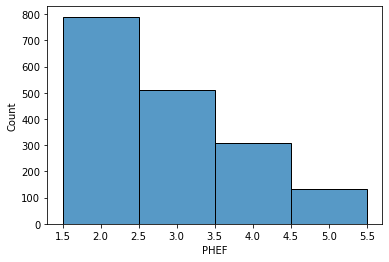

In [21]:
sns.histplot(data=subset_phef2018weekday_df, x='PHEF', bins = 3, binwidth = 1)